## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [8]:
import os
import keras
import itertools

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [9]:
train, test = keras.datasets.cifar10.load_data()

In [10]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [11]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [12]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [13]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 10
BATCH_SIZE = 256
MOMENTUM = [0.7, 0.9, 0.95, 0.99]

In [14]:
results = {}
for lr, momentum in itertools.product(LEARNING_RATE, MOMENTUM):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f, Momentum = %.2f" % (lr, momentum))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s-momemtum-%s" % (str(lr), str(momentum))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}





Experiment with LR = 0.100000, Momentum = 0.70


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast r

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 8s 161us/step - loss: 2.3106 - acc: 0.1202 - val_loss: 2.3036 - val_acc: 0.1019
Epoch 2/10
50000/50000 [==============================] - 7s 146us/step - loss: 2.1286 - acc: 0.1742 - val_loss: 2.0794 - val_acc: 0.1959
Epoch 3/10
50000/50000 [==============================] - 7s 136us/step - loss: 1.9693 - acc: 0.2625 - val_loss: 1.8660 - val_acc: 0.3128
Epoch 4/10
50000/50000 [==============================] - 9s 175us/step - loss: 1.8565 - acc: 0.3239 - val_loss: 1.8640 - val_acc: 0.3031
Epoch 5/10
50000/50000 [==============================] - 10s 196us/step - loss: 1.7971 - acc: 0.3517 - val_loss: 1.7465 - val_acc: 0.3662
Epoch 6/10
50000/50000 [==============================] - 8s 154us/step - loss: 1.7548 - acc: 0.3688 - val_loss: 1.8435 - val_acc: 0.3296
Epoch 7/10
50000/50000 [==============================] - 7s 136us/step - loss: 1.7141 - acc: 0.3851 - val_loss: 1.8631 -

Epoch 6/10
50000/50000 [==============================] - 13s 259us/step - loss: 1.3979 - acc: 0.5043 - val_loss: 1.4544 - val_acc: 0.4835
Epoch 7/10
50000/50000 [==============================] - 13s 258us/step - loss: 1.3682 - acc: 0.5144 - val_loss: 1.4603 - val_acc: 0.4804
Epoch 8/10
50000/50000 [==============================] - 13s 260us/step - loss: 1.3364 - acc: 0.5277 - val_loss: 1.5341 - val_acc: 0.4504
Epoch 9/10
50000/50000 [==============================] - 13s 259us/step - loss: 1.3036 - acc: 0.5362 - val_loss: 1.5176 - val_acc: 0.4564
Epoch 10/10
50000/50000 [==============================] - 12s 237us/step - loss: 1.2739 - acc: 0.5492 - val_loss: 1.3903 - val_acc: 0.5084
Experiment with LR = 0.010000, Momentum = 0.95
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
___________________________________________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 13s 269us/step - loss: 2.0851 - acc: 0.2455 - val_loss: 1.9423 - val_acc: 0.3140
Epoch 2/10
50000/50000 [==============================] - 12s 236us/step - loss: 1.8843 - acc: 0.3339 - val_loss: 1.8428 - val_acc: 0.3494
Epoch 3/10
50000/50000 [==============================] - 13s 260us/step - loss: 1.8063 - acc: 0.3662 - val_loss: 1.7818 - val_acc: 0.3785
Epoch 4/10
50000/50000 [==============================] - 13s 261us/step - loss: 1.7539 - acc: 0.3842 - val_loss: 1.7323 - val_acc: 0.3935
Epoch 5/10
50000/50000 [==============================] - 13s 264us/step - loss: 1.7127 - acc: 0.3985 - val_loss: 1.6965 - val_acc: 0.3993
Epoch 6/10
50000/50000 [==============================] - 12s 237us/step - loss: 1.6782 - acc: 0.4124 - val_loss: 1.6747 - val_acc: 0.4084
Epoch 7/10
50000/50000 [==============================] - 17s 337us/step - loss: 1.6493 - acc: 0.4215 - val_loss: 1.

50000/50000 [==============================] - 14s 275us/step - loss: 2.1892 - acc: 0.2254 - val_loss: 2.1802 - val_acc: 0.2322
Epoch 6/10
50000/50000 [==============================] - 12s 247us/step - loss: 2.1682 - acc: 0.2380 - val_loss: 2.1604 - val_acc: 0.2439
Epoch 7/10
50000/50000 [==============================] - 14s 283us/step - loss: 2.1486 - acc: 0.2507 - val_loss: 2.1416 - val_acc: 0.2515
Epoch 8/10
50000/50000 [==============================] - 13s 257us/step - loss: 2.1303 - acc: 0.2583 - val_loss: 2.1240 - val_acc: 0.2577
Epoch 9/10
50000/50000 [==============================] - 15s 308us/step - loss: 2.1131 - acc: 0.2664 - val_loss: 2.1074 - val_acc: 0.2665
Epoch 10/10
50000/50000 [==============================] - 16s 319us/step - loss: 2.0969 - acc: 0.2722 - val_loss: 2.0917 - val_acc: 0.2709
Experiment with LR = 0.000100, Momentum = 0.90
_________________________________________________________________
Layer (type)                 Output Shape              Param # 

50000/50000 [==============================] - 7s 144us/step - loss: 1.6286 - acc: 0.4320 - val_loss: 1.6295 - val_acc: 0.4291
Experiment with LR = 0.000010, Momentum = 0.70
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 7s 149us/step - loss: 2.3257 - acc: 0.1119 - val_loss: 2.2761 - val_acc: 0.1389
Epoch 2/10
50000/50000 [==============================] - 7s 149us/step - loss: 2.2476 - acc: 0.1701 - val_loss: 2.2216 - val_acc: 0.2103
Epoch 3/10
50000/50000 [==============================] - 7s 143us/step - loss: 2.1993 - acc: 0.2194 - val_loss: 2.1762 - val_acc: 0.2363
Epoch 4/10
50000/50000 [==============================] - 7s 139us/step - loss: 2.1561 - acc: 0.2434 - val_loss: 2.1350 - val_acc: 0.2595
Epoch 5/10
50000/50000 [==============================] - 6s 127us/step - loss: 2.1158 - acc: 0.2628 - val_loss: 2.0971 - val_acc: 0.2747
Epoch 6/10
50000/50000 [==============================] - 7s 132us/step - loss: 2.0800 - acc: 0.2755 - val_loss: 2.0635 - val_acc: 0.2838
Epoch 7/10
50000/50000 [==============================] - 7s 147us/step - loss: 2.0479 - acc: 0.2851 - val_loss: 2.0333 - 

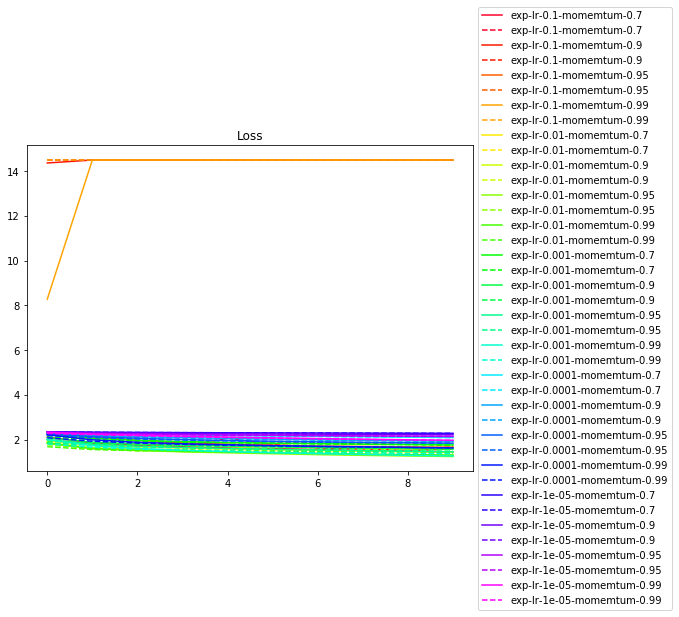

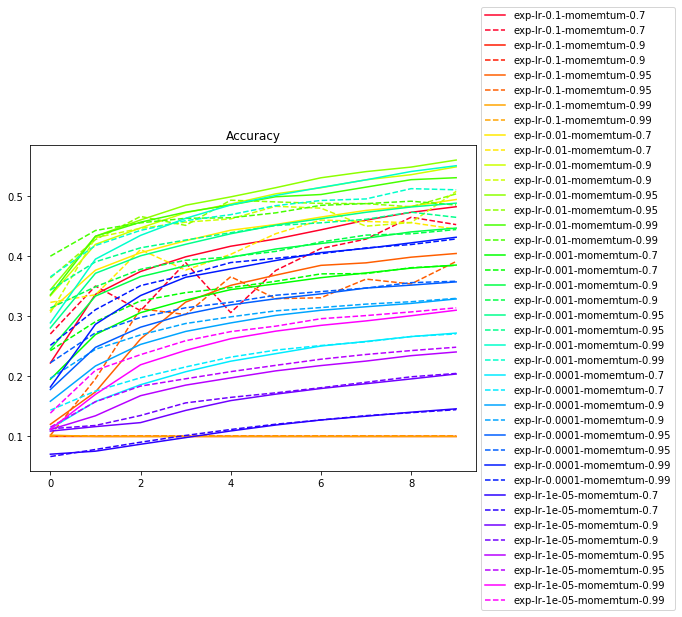

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline 
    
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()